In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
#embed figures into the notebook

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [11]:
# define a unifrom stream
def uniform(x,y,U=1.0,α = 0.0):
    u = U*np.cos(α)
    v = U*np.sin(α)
    ψ = U*(y*np.cos(α) - x*np.sin(α))
    return u,v,ψ

# define source/sink
def source(x,y,m=1.0, x0=0.0, y0=0.0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    θ = np.arctan2((y-y0),(x-x0))
    ur = m/2.0/2.0/np.pi/r
    ux = ur*np.cos(θ)
    uy = ur*np.sin(θ)
    ψ = m/2.0/np.pi*θ
    return ux, uy, ψ


In [2]:
#source in unifrom stream


In [ ]:
we will add a uniform stream and a source located at the origin, we need to define grid for x,y coordinates in the plane.


In [12]:
N = 150
x0 = -2.0
x1 = 3.0
y0 = -1.0
y1 = 1.0
x = np.linspace(x0, x1, N)
y = np.linspace(y0, y1, N)
X, Y = np.meshgrid(x,y)




In [15]:
#start by computing the free stream
U = 1.0 #m/sec
u0, v0, ψ0 = uniform(X,Y,U)

#now add the source
m = 1.0 #source strength
u1, v1, ψ1 = source(X,Y,m)

# total velocity
u = u0 + u1
v = v0 + v1
ψ = ψ0 + ψ1


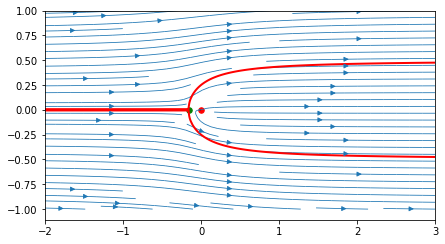

In [22]:
# make some beautiful plots
plt.figure(figsize=(7,3.85))

plt.streamplot(X, Y, u, v, density = 1, linewidth =0.8)

plt.scatter(0,0, color ='red', s=30, marker = 'o')
#plot location of stagnation point
b = m/2.0/np.pi/U
plt.scatter(-b, 0, color='green', s=30, marker ='o')
#plot boundary of half body
plt.contour(X,Y,ψ, levels=[-m/2.0, m/2.0], colors ='red', linewidths =2, linestyles = 'solid')

In [ ]:
#Source +Sink in Uniform Stream

In [33]:
#start by computing the free stream
U = 1.0 #m/sec
u0, v0, ψ0 = uniform(X,Y,U)

#now add the source at -a
a= 0.1
m = 1.0 #source strength
u1, v1, ψ1 = source(X,Y,m,x0=-a)

#now add the sink with same strength at a
u2, v2, ψ2 = source(X,Y,-m,x0=a)

# total velocity
u = u0 + u1 + u2
v = v0 + v1 + v2
ψ = ψ0 + ψ1 + ψ2


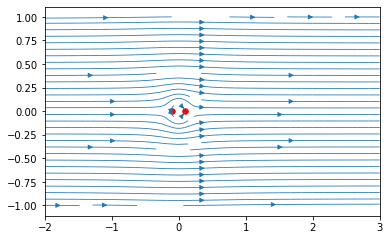

In [34]:
# make some beautiful plots
plt.figure(figsize=(6,3.85))

plt.streamplot(X, Y, u, v, density = 1, linewidth =0.8)

plt.scatter(-a,0, color ='red', s=30, marker = 'o')

plt.scatter(a,0, color ='red', s=30, marker = 'o')